In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

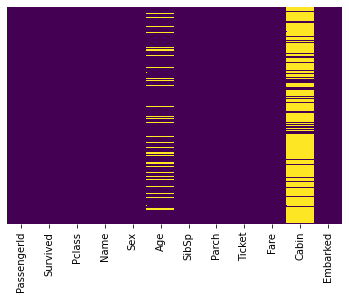

In [12]:
#shows what values are missing in the following columns
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

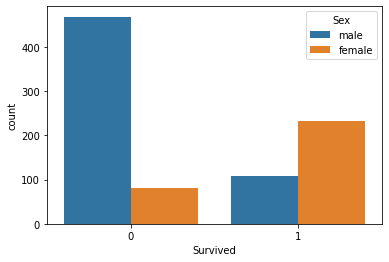

In [16]:
sns.countplot(x='Survived',hue='Sex',data=train)

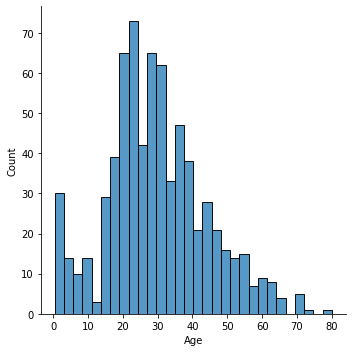

In [18]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

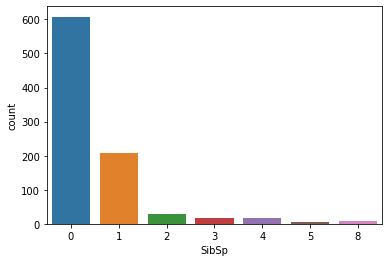

In [20]:
sns.countplot(x='SibSp',data=train)

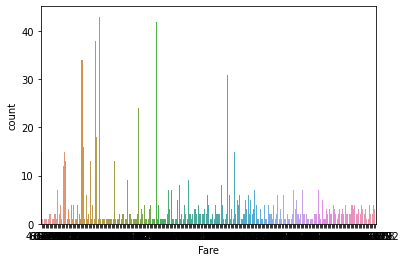

In [26]:
sns.countplot(x='Fare',data=train)

In [27]:
#Cleaning our data as there are several null values in age 

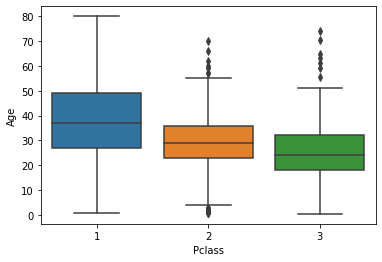

In [28]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [64]:
#imputation #read pandas again so that you will be able to know the actual means
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
          return 37
        elif Pclass==2:
          return 29
        else:
          return 24
    else:
      return Age




In [65]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

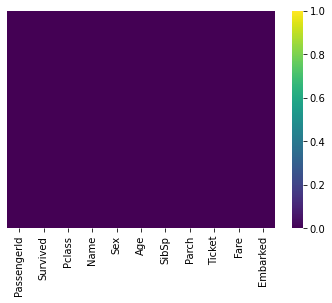

In [75]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [71]:
train.drop('Cabin',axis=1,inplace=True)

In [76]:
train.dropna(inplace=True)

In [ ]:
# WE WILL CREATE A DUMMY VARIABLE

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [80]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [84]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)


In [85]:
train=pd.concat([train,sex,embark],axis=1)

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S,1,0,1


In [93]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [94]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24,1,0,7.2500,1,0,1
1,1,1,37,1,0,71.2833,0,0,0
2,1,3,24,0,0,7.9250,0,0,1
3,1,1,37,1,0,53.1000,0,0,1
4,0,3,24,0,0,8.0500,1,0,1


In [95]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [98]:
from sklearn.model_selection import train_test_split


In [131]:
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.2,random_state=101 )

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logmodel=LogisticRegression()

In [134]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
predictions=logmodel.predict(X_test)

In [136]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       107
           1       0.82      0.65      0.72        71

    accuracy                           0.80       178
   macro avg       0.81      0.78      0.79       178
weighted avg       0.81      0.80      0.80       178

